# 2주차 세션
### 2/26 운영진 실습

* 실습에 사용하는 데이터 : titanic
* titanic 데이터는 seaborn 패키지에서 가져와서 사용하여 실습에 활용할 예정입니다.
* 실습은 1 ~ 3만 진행합니다. (데이터 파악하기 ~ 중복값처리)
* 4 ~ 6은 코드를 확인하면서, 개별적으로 학습에 활용하시면 됩니다.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = sns.load_dataset('titanic')

### **1. 데이터 파악하기**

In [ ]:
#데이터 프레임 맨 앞에서부터 5개의 행 보기 : 데이터프레임.head()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#데이터 프레임 맨 뒤에서부터 5개의 행 보기 : 데이터프레임.tail()
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
#데이터의 변수별 특성 파악 및 결측값/데이터 타입 확인 : 데이터프레임.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#데이터의 변수별 통계값, 분포 파악 : 데이터프레임.describe()
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#관측치들이 결측값인지의 확인 : 데이터프레임.isnull()
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#열별로 결측치가 몇개인지 개수 확인 : 데이터프레임.isnull().sum()
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#missingno 라이브러리의 사용 : 결측치를 시각화
!pip install missingno
import missingno as msno

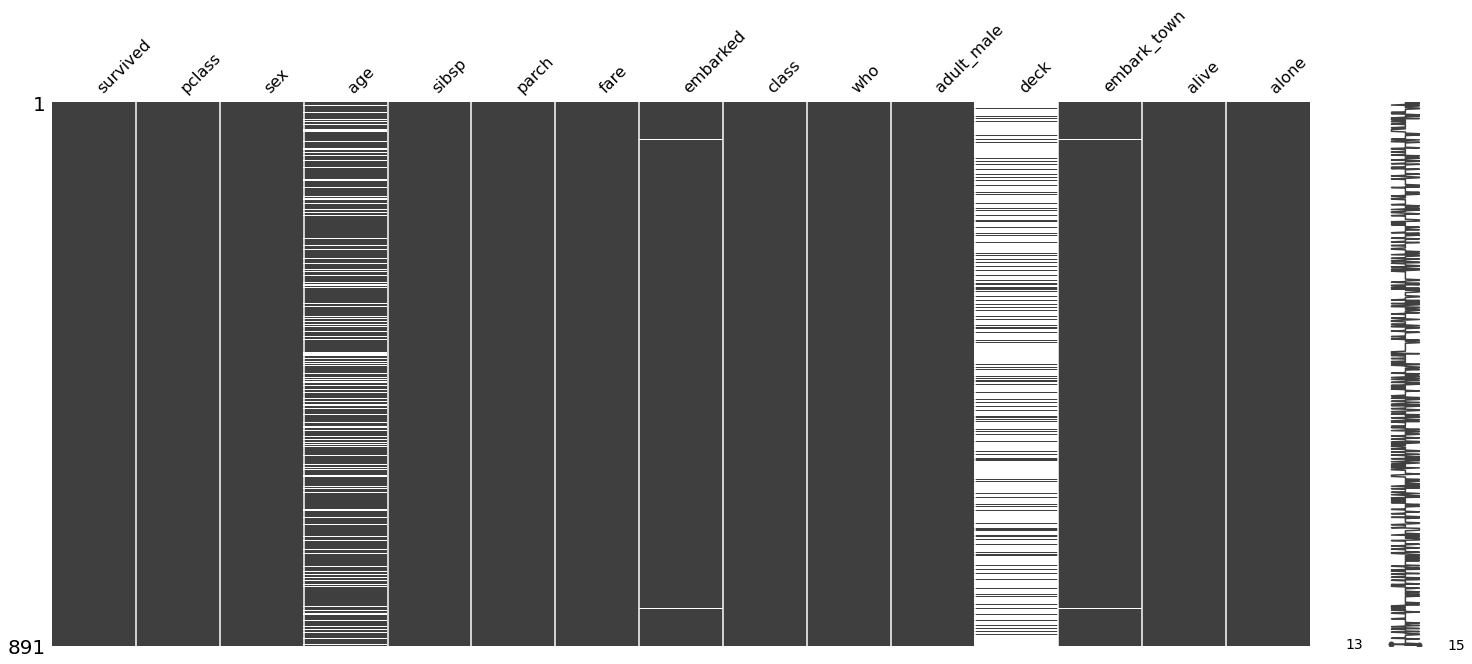

In [ ]:
# 결측치의 시각화 방법1. msno.matrix()의 사용
# 흰줄로 표현되는 것이 결측값
msno.matrix(df)

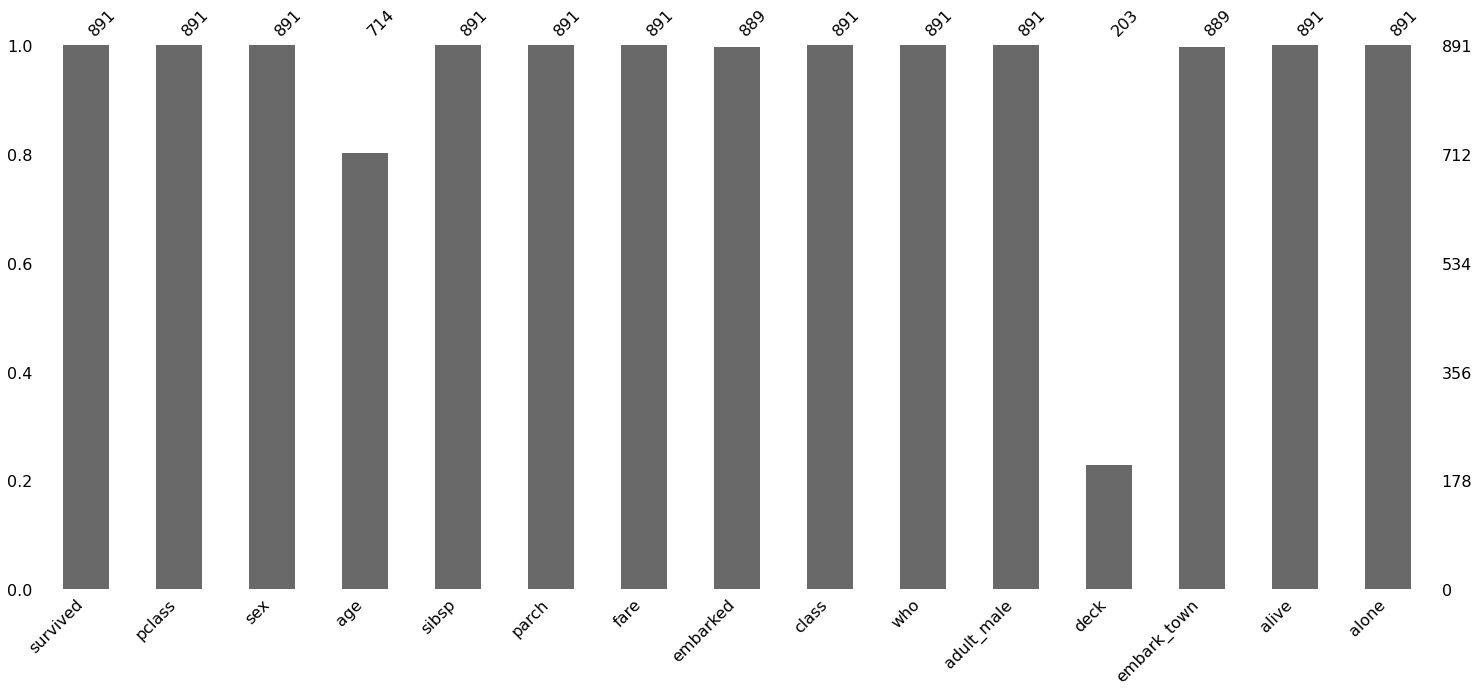

In [ ]:
# 결측치의 시각화 방법2. msno.bar()의 사용
# 변수 별로 결측값을 시각화
msno.bar(df)

### **2. 누락/ 중복 데이터의 처리**

In [ ]:
# 결측값 확인
titanic = sns.load_dataset('titanic')
titanic.isnull().sum() 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# 결측값이 존재하는 전체 행 삭제
titanic_delrow=titanic.dropna()
titanic_delrow

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
# 특정 열(age, embarked) 에서 결측값이 존재하는 전체 행 삭제
# how의 속성을 any로 지정시, 결측값에 해당하는 모든 경우 삭제
titanic_delall= titanic.dropna(subset = ['age', 'embarked'], how = 'any', axis = 0)
titanic_delall

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
dict = {'First' : [72, np.nan, np.nan, 95],
        'Second' : [np.nan, np.nan, np.nan, np.nan],
        'Third' : [65, np.nan, 76, 88],
        'Fourth' : [np.nan, np.nan, np.nan, 90]}

df = pd.DataFrame(dict)
df

,First,Second,Third,Fourth
0,72.0,NaN,65.0,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,76.0,NaN
3,95.0,NaN,88.0,90.0


In [ ]:
# 모든 열에 관해 전부 결측값을 가지고 있는 행 삭제 : how="all" 
# df에서 인덱스번호 1인 행만 삭제
df.dropna(how = 'all') 

,First,Second,Third,Fourth
0,72.0,NaN,65.0,NaN
2,NaN,NaN,76.0,NaN
3,95.0,NaN,88.0,90.0


In [ ]:
# 각 row에서 NaN이 아닌 값이 최소 n개 이상 나오지 않으면 삭제: 데이터프레임.dropna(thresh = n) 
df.dropna(thresh=1)

,First,Second,Third,Fourth
0,72.0,NaN,65.0,NaN
2,NaN,NaN,76.0,NaN
3,95.0,NaN,88.0,90.0


In [ ]:
# 결측값이 속한 열 전체 삭제: dropna(axis=1)
titanic.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [ ]:
# 특정 행을 기준으로 결측값이 속한 열 전체 삭제
# 0, 1, 2, 42, 258 행에서 결측값을 하나라도 갖는 'age', 'deck' 컬럼 삭제
titanic.dropna(axis = 1, subset = [0, 1, 2, 42, 258])

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
# 결측값의 대치 : fillna(a)_ a를 대체값으로 넣기
# 결측치를 상위값으로 치환, 0행의 경우 바로 앞 데이터가 없기 때문에 NaN으로 유지됨
titanic.fillna(method = 'ffill')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,19.0,1,2,23.4500,S,Third,woman,False,B,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# 결측치를 하위값으로 치환, 마지막 행의 경우 바로 뒤 데이터가 없기 때문에 NaN으로 유지됨
titanic.fillna(method = 'bfill')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,E,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,B,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,26.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# 결측치를 최빈값으로 대치 : fillna('최빈값')
titanic['embark_town'].value_counts() #step1. value_counts()를 통해 해당 열의 최빈값 확인

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
# 결측치를 최빈값으로 대치 : fillna('최빈값')
titanic['embark_town'].fillna('Southampton') #step2. value_counts()를 통해 살펴본 열의 최빈값으로 결측치 대치

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [ ]:
# 결측치를 열의 평균값으로 대치
# age 칼럼의 결측치를, age열의 평균값으로 대체
titanic['age'] = titanic['age'].replace(to_replace = np.nan, value = titanic['age'].mean())
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### **3. 중복값 처리**

In [ ]:
df2 = pd.DataFrame({'c1' : [5, 2, 3, 5, 4],
                    'c2' : ['a', 'a', 'b', 'a', 'c'],
                    'c3' : [5, 7, 5, 5, 4]},
                   index = ['num1', 'num2', 'num3', 'num4', 'num5'])
df2

,c1,c2,c3
num1,5,a,5
num2,2,a,7
num3,3,b,5
num4,5,a,5
num5,4,c,4


In [ ]:
# 행을 기준으로, 위에서 아래로 데이터를 읽으면서 행의 데이터가 중복되었는지를 확인 : duplicated()
# true : 중복, false: 중복x
df2.duplicated()

num1    False
num2    False
num3    False
num4     True
num5    False
dtype: bool

In [ ]:
# 특정 열을 지정하여, 지정한 열을 기준으로 중복데이터 유무를 확인 : 데이터프레임.duplicated([column])
df2.duplicated(['c2', 'c3'])

num1    False
num2    False
num3    False
num4     True
num5    False
dtype: bool

In [ ]:
# 중복 데이터의 처리 - 삭제 : 데이터프레임.drop_duplicates()
df2.drop_duplicates()

,c1,c2,c3
num1,5,a,5
num2,2,a,7
num3,3,b,5
num5,4,c,4


In [ ]:
# 특정 열을 기준으로 중복되지 않은 값 확인, 첫행을 기준으로 중복 여부를 판단하여 중복되는 나머지 행을 삭제 : drop_duplicates([column]) 
df2.drop_duplicates(subset = ['c2']) # c2열을 기준으로 중복된 값 삭제

,c1,c2,c3
num1,5,a,5
num3,3,b,5
num5,4,c,4


### **4. 불균형 데이터 처리**

In [ ]:
from imblearn.under_sampling import * # 언더 샘플링
from imblearn.over_sampling import * # 오버 샘플링
from imblearn.combine import * # 복합 샘플링
df = sns.load_dataset('titanic')

In [ ]:
# X, y 설정
X = df[['pclass', 'sibsp', 'parch', 'fare']]
y = df[['survived']]

In [ ]:
print('the shape of X : ', X.shape)
print('the shape of y : ', y.shape)

print('counts of label "1" : ', (y == 1).sum())
print('counts of label "0" : ', (y == 0).sum())

the shape of X :  (891, 4)
the shape of y :  (891, 1)
counts of label "1" :  survived    342
dtype: int64
counts of label "0" :  survived    549
dtype: int64


In [ ]:
# Random Under Sampler, 더작은 1의 개수에 맞게 감소
X_resampled, y_resampled = RandomUnderSampler(random_state = 0).fit_resample(X, y)

print('the shape of X_resampled : ', X_resampled.shape)
print('the shape of y_resampled : ', y_resampled.shape)

print('counts of label "1" : ', (y_resampled == 1).sum())
print('counts of label "0" : ', (y_resampled == 0).sum())

the shape of X_resampled :  (684, 4)
the shape of y_resampled :  (684, 1)
counts of label "1" :  survived    342
dtype: int64
counts of label "0" :  survived    342
dtype: int64


In [ ]:
# TomekLinks, 토멕링크에 해당된 6개 데이터 제거
X_resampled, y_resampled = TomekLinks().fit_resample(X, y)

print('the shape of X_resampled : ', X_resampled.shape)
print('the shape of y_resampled : ', y_resampled.shape)

print('counts of label "1" : ', (y_resampled == 1).sum())
print('counts of label "0" : ', (y_resampled == 0).sum())

the shape of X_resampled :  (885, 4)
the shape of y_resampled :  (885, 1)
counts of label "1" :  survived    342
dtype: int64
counts of label "0" :  survived    543
dtype: int64


In [ ]:
# Condensed Nearest Neighbor, 0 모두 제거
X_resampled, y_resampled = CondensedNearestNeighbour(random_state = 0).fit_resample(X, y)

print('the shape of X_resampled : ', X_resampled.shape)
print('the shape of y_resampled : ', y_resampled.shape)

print('counts of label "1" : ', (y_resampled == 1).sum())
print('counts of label "0" : ', (y_resampled == 0).sum())

the shape of X_resampled :  (598, 4)
the shape of y_resampled :  (598, 1)
counts of label "1" :  survived    342
dtype: int64
counts of label "0" :  survived    256
dtype: int64


In [ ]:
# Random Over Sampler, 더 작은 0의 개수에 맞게 1 개수 증가
X_resampled, y_resampled = RandomOverSampler(random_state = 0).fit_resample(X, y)

print('the shape of X_resampled : ', X_resampled.shape)
print('the shape of y_resampled : ', y_resampled.shape)

print('counts of label "1" : ', (y_resampled == 1).sum())
print('counts of label "0" : ', (y_resampled == 0).sum())

the shape of X_resampled :  (1098, 4)
the shape of y_resampled :  (1098, 1)
counts of label "1" :  survived    549
dtype: int64
counts of label "0" :  survived    549
dtype: int64


In [ ]:
# ADASYN
X_resampled, y_resampled = ADASYN(random_state = 0).fit_resample(X, y)

print('the shape of X_resampled : ', X_resampled.shape)
print('the shape of y_resampled : ', y_resampled.shape)

print('counts of label "1" : ', (y_resampled == 1).sum())
print('counts of label "0" : ', (y_resampled == 0).sum())

the shape of X_resampled :  (1133, 4)
the shape of y_resampled :  (1133, 1)
counts of label "1" :  survived    584
dtype: int64
counts of label "0" :  survived    549
dtype: int64


In [ ]:
# SMOTE
X_resampled, y_resampled = SMOTE(random_state = 777).fit_resample(X, y)

print('the shape of X_resampled : ', X_resampled.shape)
print('the shape of y_resampled : ', y_resampled.shape)

print('counts of label "1" : ', (y_resampled == 1).sum())
print('counts of label "0" : ', (y_resampled == 0).sum())

the shape of X_resampled :  (1098, 4)
the shape of y_resampled :  (1098, 1)
counts of label "1" :  survived    549
dtype: int64
counts of label "0" :  survived    549
dtype: int64


### **5. Label Encoding**

In [ ]:
# pd.factorize() : 첫번째 값(인코딩 값)과 두번째 값(범주 값) 반환
# titanic 데이터셋의, 문자열 'class'를 숫자 값으로 변환
e, c = pd.factorize(df['class'])

In [ ]:
# 인코딩된 정수값
e

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 2,
       0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1,
       0, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0,

In [ ]:
# 범주
c

CategoricalIndex(['Third', 'First', 'Second'], categories=['First', 'Second', 'Third'], ordered=False, dtype='category')

In [ ]:
df['new_label'] = e
df[['class', 'new_label']].head()

,class,new_label
0,Third,0
1,First,1
2,Third,0
3,First,1
4,Third,0


In [ ]:
# 사이킷런을 이용한 레이블 인코딩
# 'Third'->2, 'First'->0, 'Second'->1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
t_label = encoder.fit_transform(df['class'])
t_label

array([2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 1,
       2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0,
       2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,

In [ ]:
# 디코딩 : 숫자로 변환되기 전 값으로 되돌리기
encoder.inverse_transform(t_label)

array(['Third', 'First', 'Third', 'First', 'Third', 'Third', 'First',
       'Third', 'Third', 'Second', 'Third', 'First', 'Third', 'Third',
       'Third', 'Second', 'Third', 'Second', 'Third', 'Third', 'Second',
       'Second', 'Third', 'First', 'Third', 'Third', 'Third', 'First',
       'Third', 'Third', 'First', 'First', 'Third', 'Second', 'First',
       'First', 'Third', 'Third', 'Third', 'Third', 'Third', 'Second',
       'Third', 'Second', 'Third', 'Third', 'Third', 'Third', 'Third',
       'Third', 'Third', 'Third', 'First', 'Second', 'First', 'First',
       'Second', 'Third', 'Second', 'Third', 'Third', 'First', 'First',
       'Third', 'First', 'Third', 'Second', 'Third', 'Third', 'Third',
       'Second', 'Third', 'Second', 'Third', 'Third', 'Third', 'Third',
       'Third', 'Second', 'Third', 'Third', 'Third', 'Third', 'First',
       'Second', 'Third', 'Third', 'Third', 'First', 'Third', 'Third',
       'Third', 'First', 'Third', 'Third', 'Third', 'First', 'First',
    

### **6.Feature Scaling**

In [ ]:
# 표준화
# 이상치가 있어도 표준화하는 데에 문제 없음

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

x = np.arange(10)
x[9] = 1000 # outlier 추가
scaled = standard_scaler.fit_transform(x.reshape(-1, 1))

print('평균 : ', x.mean(), '\n분산 : ', x.std())
print('표준화한 결과')
print('평균 : ', scaled.mean(), '\n분산 : ', scaled.std())
print('평균이 0에 근사함을 알 수 있다')
print('평균 : ', round(scaled.mean(), 2), '\n분산 : ', scaled.std())

평균 :  103.6 
분산 :  298.8100399919654
표준화한 결과
평균 :  4.4408920985006264e-17 
분산 :  1.0
평균이 0에 근사함을 알 수 있다
평균 :  0.0 
분산 :  1.0


In [ ]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
x = np.arange(10)
scaled = MinMaxScaler().fit_transform(x.reshape(-1, 1))
print('평균 : ', scaled.mean(), '\n분산 : ', scaled.std())

x[9] = 1000 # outlier 추가
print('이상치 추가 후')
scaled = MinMaxScaler().fit_transform(x.reshape(-1, 1))
print('평균 : ', scaled.mean(), '\n분산 : ', scaled.std())

평균 :  0.5 
분산 :  0.31914236925211265
이상치 추가 후
평균 :  0.1036 
분산 :  0.2988100399919655
